# Final Project for Data Science Course
---------

## Name  : Syed Riaz Ali
## Topic : Heart Disease Study

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset

df = pd.read_csv("heart.csv")
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Description of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking if dataset contains any null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**This above command shows that there is no null values in the data set**

In [7]:
# Checking if dataset contains any null value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**This above command shows that there is no nan values in the data set**

The variables types are

**Binary**: sex, fbs, exang, target

**Categorical**: cp, restecg, slope, ca, thal 

**Continuous**: age, trestbps, chol, thalac, oldpeak 

In [8]:
# look at which features are categorical/numerical
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

num_features=[i for i in df.columns if df.dtypes[i] in ['int64','float']]
num_features=num_features[:-1]
num_features

print('Categorical features: ',cat_features)
print('Numerical features: ',num_features)

Categorical features:  []
Numerical features:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


<AxesSubplot:xlabel='age', ylabel='count'>

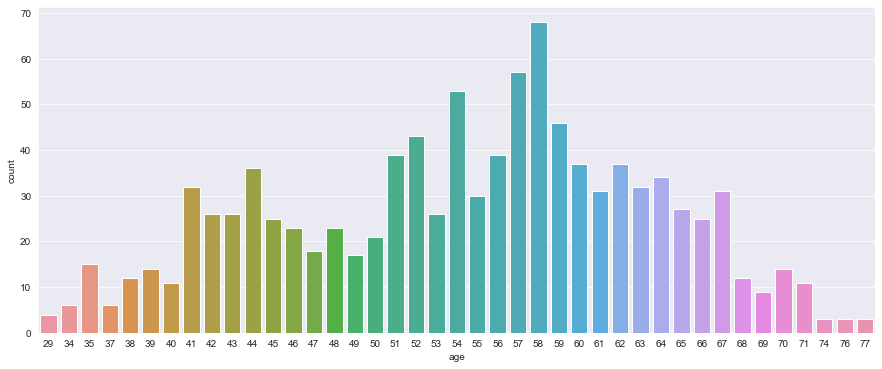

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.countplot(x=df['age'])

In [10]:
# Finding out how many are targeted by heart disease in the dataset
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

Here 1 shows that the person is suffering from heart disease and 0 shows that a person is not suffering from heart disease.
Hence from our analysis 526 people suffers from a heart disease and 499 people are those who are fit and have not a heart disease.

In [11]:
# Finding out how many males and females are there in our dataset
# Here 1 =  Male and 0 = Female
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

Above analysis shows that we have 713 males and 312 females in our dataset

<AxesSubplot:xlabel='sex', ylabel='count'>

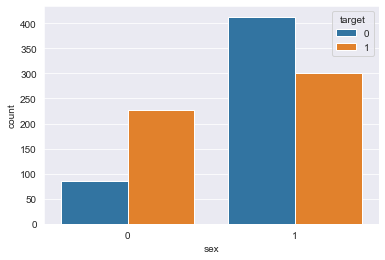

In [12]:
sns.countplot(data= df, x='sex',hue='target')

In [13]:
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

In [14]:
df1 = df.copy()
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,No,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,Yes,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,Yes,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,No,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,No,1.9,1,3,2,0


In [15]:
def change(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

df1["sex"].apply(change)

0       male
1       male
2       male
3       male
4       male
        ... 
1020    male
1021    male
1022    male
1023    male
1024    male
Name: sex, Length: 1025, dtype: object

In [16]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,No,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,Yes,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,Yes,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,No,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,No,1.9,1,3,2,0


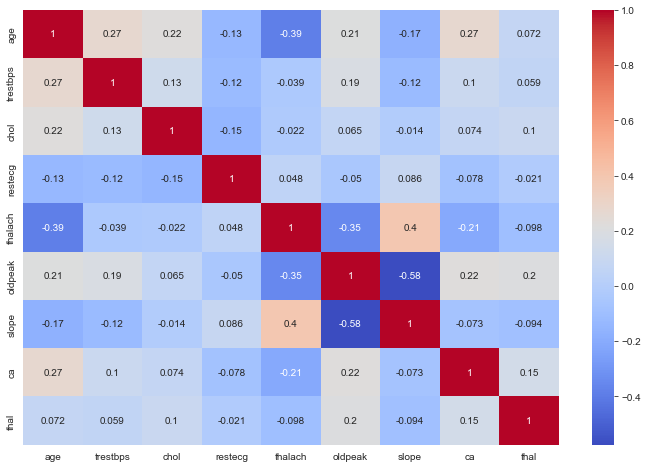

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['target', 'sex', 'cp', 'fbs'], axis=1).corr(), annot=True, cmap='coolwarm');